<a href="https://colab.research.google.com/github/jacr2006/AICamera/blob/master/Notebooks/CNN/audio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparation between MFCC coecificient form C++ library and Python library**

In [1]:
pip install torchaudio

     |████████████████████████████████| 7.6MB 4.2MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [2]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5890 sha256=86e23ec54cc5916f066fff7e5d63dfd1127e55dd62ca62dcaede3ff42f714318
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [3]:
!pip install pysptk

     |████████████████████████████████| 419kB 6.4MB/s 
  Created wheel for pysptk: filename=pysptk-0.1.18-cp36-cp36m-linux_x86_64.whl size=950136 sha256=4e5e0a771d1ba52410a0990c83e9d14579534ff9f94a0456690606500639f6b3
  Stored in directory: /root/.cache/pip/wheels/c7/96/d2/a163240019c59504402fab713af259026af81a99dea943404a
Successfully built pysptk


In [12]:
!pip install scikits.audiolab
!pip install scipy

     |████████████████████████████████| 901kB 5.0MB/s 
  Created wheel for scikits.audiolab: filename=scikits.audiolab-0.11.0-cp36-cp36m-linux_x86_64.whl size=619637 sha256=1637693ea290b369345dd4d1481f0ec8e5a53c649ec02b02394f2631655ddfec
  Stored in directory: /root/.cache/pip/wheels/19/95/78/704c96f15db4fae2d17cdb1e8c48ec0b8ce02369f8d7139285
Successfully built scikits.audiolab


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

import pylab

import librosa
import librosa.display

import python_speech_features
from scipy.signal.windows import hann
import torchaudio.transforms
import torch
import matplotlib.pyplot as plt

import pysptk

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


##Pruebas SPTK

- Using C code:

to build from source:
````
git clone https://git.code.sf.net/p/sp-tk/SPTK sp-tk-SPTK
cd sp-tk-SPTK/
cd src/
apt-get install -y dh-autoreconf
apt-get install automake
apt install csh
sudo automake --add-missing
cd build/
../configure
make
make install
````
to get MFCC from .wav file
````
wav2raw +f file.wav
frame -l 2048 -p 512 file.raw |\
mfcc -l 2048 -a 0.97 -e 1.0 -m 40 -n 41 -s 44.1 -w 0 > file.mfc
````
- Using Python

https://nbviewer.jupyter.org/github/r9y9/pysptk/blob/master/examples/Speech%20analysis%20and%20re-synthesis.ipynb


In [8]:
!rm csv*
!rm 35800*

rm: cannot remove 'csv*': No such file or directory
rm: cannot remove '35800*': No such file or directory


MFCC coefficient from C SPTK code, in HEX file

In [114]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.mfc to 35800.mfc
User uploaded file "35800.mfc" with length 55200 bytes


In [ ]:
filename="35800.mfc"

with open(filename,"rb") as f:
	dataHex = f.read(-1)
 
dataHex

In [116]:
len(dataHex)

55200

In [117]:
import struct

struct.unpack('f', dataHex[0:4])

(-20.275026321411133,)

MFCC coefficient from C SPTK code, in float CSV file:


In [49]:
!rm csv*
!rm 35800*

In [50]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving csv1.mfcc to csv1.mfcc
User uploaded file "csv1.mfcc" with length 159680 bytes


In [51]:
import numpy as np

csv = np.genfromtxt('csv1.mfcc', delimiter=",")
csv_mfcc_c = np.array(csv, dtype=np.float)
print( csv_mfcc_c.shape )
csv_mfcc_c

(13801,)


array([-1.56224784e+01,  5.09308152e+00,  9.85869100e-02, ...,
        1.27739000e-03, -4.68451000e-03,             nan])

In [52]:
csv_mfcc_c = csv_mfcc_c[0:13800]
csv_mfcc_c = csv_mfcc_c.reshape(345,40)
print( csv_mfcc_c.shape )
csv_mfcc_c

(345, 40)


array([[-1.56224784e+01,  5.09308152e+00,  9.85869100e-02, ...,
        -4.04687860e-01, -3.03045220e-01, -3.61677630e-01],
       [-1.68842895e+01,  8.62118417e+00,  5.87418920e-01, ...,
        -3.95724780e-01,  1.29763970e-01,  3.09056060e-01],
       [-1.68584565e+01,  1.22884970e+01, -1.01309255e+00, ...,
        -3.65479900e-02,  3.67276300e-02, -3.23301200e-02],
       ...,
       [-1.69770975e+01,  1.22394800e+01, -1.46488569e+00, ...,
        -3.86457020e-01,  1.36769070e-01,  1.08220570e-01],
       [-1.68590356e+01,  1.22734210e+01, -1.32533084e+00, ...,
        -1.44558310e-01, -1.35620000e-02,  2.51851600e-02],
       [-1.61253968e+01,  1.22637028e+01, -2.34243709e+00, ...,
        -4.99402000e-02,  1.27739000e-03, -4.68451000e-03]])

MFCC coefficient from wav file, using Python SPTK api

In [53]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.wav to 35800.wav
User uploaded file "35800.wav" with length 352844 bytes


In [54]:
from scipy.io.wavfile import read as wavread

sampling_rate, audio_data = wavread('35800.wav')  # x is a numpy array of integers, representing the samples 
print('Audio file sampling rate: %d [Hz]' % (sampling_rate))

Audio file sampling rate: 44100 [Hz]


In [55]:
frame_length = 2048
hop_length = 512

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(audio_data, frame_length=frame_length, hop_length=hop_length, axis=0).astype(np.float64)
frames *= pysptk.sptk.hamming(frame_length, normalize=0)


assert frames.shape[1] == frame_length 

In [56]:
# Order of mel-cepstrum
mc = pysptk.sptk.mfcc(frames, order=40, fs=sampling_rate, alpha=0.97, eps=1.0, window_len=2048, frame_len=None, num_filterbanks=41, cepslift=22, use_dft=False, use_hamming=False, czero=False, power=False)

In [57]:
print(mc.shape)
mc

(341, 40)


array([[-2.75830750e+01,  4.51546589e+00, -1.14694690e+00, ...,
        -1.10125689e+00,  2.69824105e-01,  5.85192896e-01],
       [-2.75501874e+01,  5.30653744e+00,  1.17633804e+00, ...,
        -1.34232886e+00,  1.81527781e-02,  5.49205425e-01],
       [-2.80889394e+01,  4.87590939e+00,  1.74146080e+00, ...,
        -4.77891626e-01, -1.83090809e-01,  1.77623209e-01],
       ...,
       [-2.88319092e+01,  5.47179758e+00,  3.25236341e+00, ...,
        -1.44281127e+00,  4.40214283e-01,  3.93882779e-02],
       [-2.93750050e+01,  5.23716065e+00,  3.71182859e+00, ...,
        -1.19044344e+00, -1.69724926e-02, -9.82385834e-02],
       [-2.92996536e+01,  4.33750085e+00,  2.00052358e+00, ...,
         6.69450516e-01,  9.85643343e-01,  4.89941970e-01]])

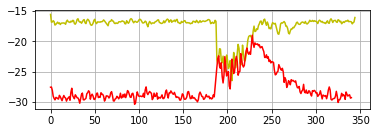

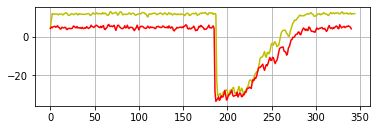

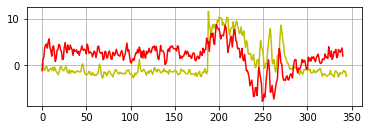

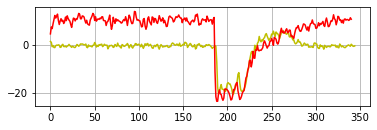

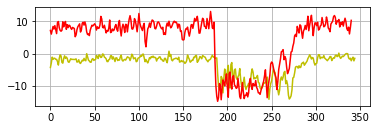

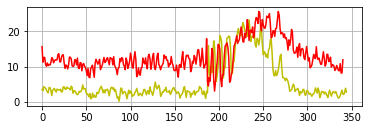

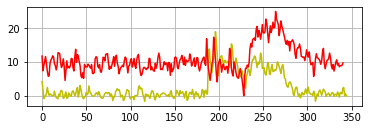

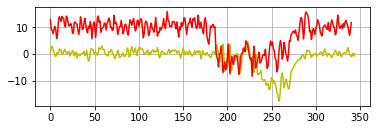

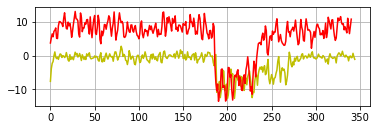

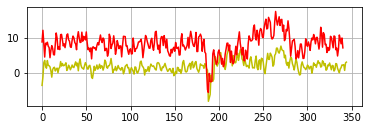

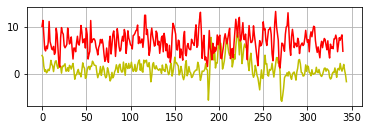

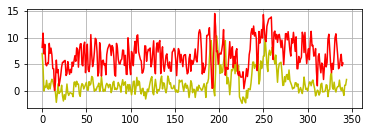

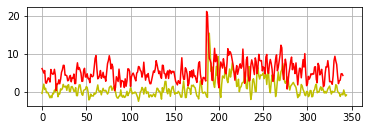

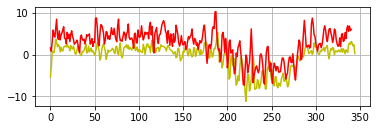

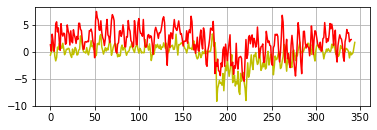

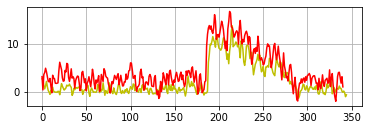

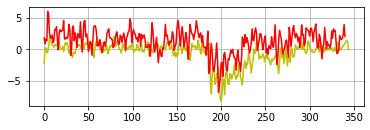

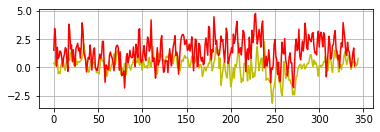

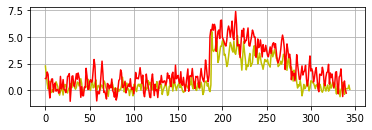

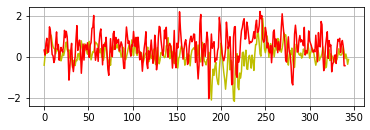

In [118]:
# Comparation features 0...20
for i in range(0,20):
  plot1 = plt. figure(i+0)
  plt.subplot(2, 1, 1)
  plt.plot(csv_mfcc_c[:,i], 'y')
  plt.plot(mc[:,i], 'r')
  plt.grid()


Comparation RAW file

In [67]:
!rm csv*
!rm 35800*

In [68]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.raw to 35800.raw
User uploaded file "35800.raw" with length 705600 bytes


In [ ]:
filename="35800.raw"

with open(filename,"rb") as f:
	dataRaw = f.read(-1)
 
dataRaw

In [71]:
import struct
#
#struct.unpack('f', dataRaw[0:4])
raw = [struct.unpack('f', dataRaw[i*4:(i*4)+4]) for i in range( int(len(dataRaw)/4) ) ]

In [72]:
print(np.argmax(raw))
print(np.argmin(raw))
print(np.argmax(raw)-np.argmin(raw))
print(np.mean(raw))

100833
96957
3876
-0.10442176870748299


In [73]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.wav to 35800.wav
User uploaded file "35800.wav" with length 352844 bytes


In [74]:
from scipy.io.wavfile import read as wavread
sampling_rate, audio_data = wavread('35800.wav')  # x is a numpy array of integers, representing the samples 


In [76]:
print(np.argmax(audio_data))
print(np.argmin(audio_data))
print(np.argmax(audio_data)-np.argmin(audio_data))
print(np.mean(audio_data))

100833
96957
3876
-0.10442176870748299


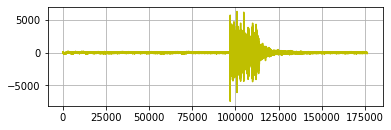

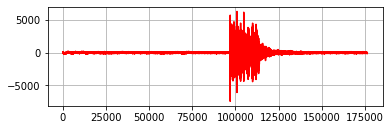

In [75]:
# Comparation char
plot1 = plt. figure(1)
plt.subplot(2, 1, 1)
plt.plot(raw, 'y')
plt.grid()

plot2 = plt. figure(2)
plt.subplot(2, 1, 1)
plt.plot(audio_data, 'r')
plt.grid()

##Mel Scale based transformations

- MFCC coeficients from C++ code library

In [139]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.wav to 35800 (1).wav
User uploaded file "35800.wav" with length 352844 bytes


In [ ]:
csv = np.genfromtxt('35800.mfcc', delimiter=",")
out_mfcc_c = np.array(csv, dtype=np.float)
print( out_mfcc_c.shape )
out_mfcc_c

(360, 41)


array([[ 1.187262e+02, -1.654549e+01,  1.204610e+00, ...,  1.968044e-01,
         2.249609e-01,  4.761910e-14],
       [ 1.185378e+02, -1.625214e+01,  1.178300e+00, ...,  2.345284e-01,
         6.121048e-02,  4.698676e-14],
       [ 1.180827e+02, -1.637545e+01,  1.405648e+00, ...,  6.259358e-01,
         6.142807e-02,  4.724425e-14],
       ...,
       [ 1.318360e+02, -1.081040e+01, -3.205285e+00, ..., -2.523398e-01,
        -5.351861e-01,  3.108108e-14],
       [ 1.293852e+02, -1.076234e+01, -1.131279e+00, ..., -2.322627e-01,
        -4.127027e-01,  3.360875e-14],
       [ 1.294776e+02, -1.061097e+01, -1.488367e-01, ..., -1.404333e-01,
        -2.838992e-01,  3.688846e-14]])

In [ ]:
out_mfcc_c.shape

(360, 41)

In [ ]:
#out_mfcc_c=out_mfcc_c.transpose()

- MFCC coeficients form Python librarys

In [140]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 35800.wav to 35800 (2).wav
User uploaded file "35800.wav" with length 352844 bytes


In [141]:
audio_data, sampling_rate = librosa.load( '35800.wav', sr=44100, mono=True,  )
print('Audio file sampling rate: %d [Hz]' % (sampling_rate))

Audio file sampling rate: 44100 [Hz]


In [142]:
audio_data.shape

(176400,)

In [143]:
ipd.Audio( audio_data, rate = sampling_rate )

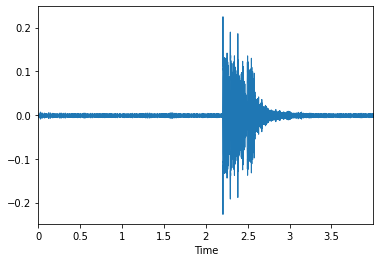

In [144]:
librosa.display.waveplot( audio_data, sr = sampling_rate )

In [145]:
n_mels=40
n_mfcc=40
n_fft=2048
hop_length=512


In [146]:
mfccs = librosa.feature.mfcc( y = audio_data, sr = sampling_rate, n_mels=n_mels, n_mfcc = n_mfcc, n_fft=n_fft, hop_length=hop_length, fmax = sampling_rate / 2.0, norm=None)
print( mfccs.shape )
mfccs[0,:]

(40, 345)


array([-3451.3223, -3684.3452, -3981.355 , -3996.1675, -4010.3372,
       -4010.3027, -4047.412 , -4088.6626, -4077.2168, -4068.3647,
       -4080.7412, -4055.483 , -4038.3845, -4044.646 , -4051.0337,
       -4076.8784, -4037.3535, -4009.102 , -4080.2725, -4108.8945,
       -4094.0352, -4071.67  , -4065.4785, -4077.8076, -4084.5122,
       -4045.164 , -4009.1582, -4029.1406, -4054.2473, -4075.6035,
       -4092.1548, -4116.2207, -4109.1323, -4078.0415, -4096.5034,
       -4103.895 , -4074.898 , -4064.67  , -4081.7422, -4077.776 ,
       -4062.0781, -4106.339 , -4116.958 , -4072.244 , -4039.0598,
       -3972.816 , -3967.2341, -4040.1062, -4046.963 , -4088.4956,
       -4106.0444, -4079.4644, -4069.112 , -4075.9019, -4061.7915,
       -4039.4429, -4080.7734, -4067.2441, -4078.17  , -4060.5999,
       -4077.5269, -4074.751 , -4069.3643, -4079.2598, -4037.7568,
       -4005.852 , -4054.2   , -4086.8132, -4109.6035, -4119.0264,
       -4064.06  , -4060.0403, -4048.084 , -4089.0933, -4107.2

In [147]:
mfcc_lib_db = librosa.feature.mfcc( y = audio_data, sr = sampling_rate, n_mels=n_mels, n_mfcc = n_mfcc, n_fft=n_fft, hop_length=hop_length, fmax = sampling_rate / 2.0, norm=None, htk=False)
print( mfcc_lib_db.shape )
mfcc_lib_db[0,:]

(40, 345)


array([-3451.3223, -3684.3452, -3981.355 , -3996.1675, -4010.3372,
       -4010.3027, -4047.412 , -4088.6626, -4077.2168, -4068.3647,
       -4080.7412, -4055.483 , -4038.3845, -4044.646 , -4051.0337,
       -4076.8784, -4037.3535, -4009.102 , -4080.2725, -4108.8945,
       -4094.0352, -4071.67  , -4065.4785, -4077.8076, -4084.5122,
       -4045.164 , -4009.1582, -4029.1406, -4054.2473, -4075.6035,
       -4092.1548, -4116.2207, -4109.1323, -4078.0415, -4096.5034,
       -4103.895 , -4074.898 , -4064.67  , -4081.7422, -4077.776 ,
       -4062.0781, -4106.339 , -4116.958 , -4072.244 , -4039.0598,
       -3972.816 , -3967.2341, -4040.1062, -4046.963 , -4088.4956,
       -4106.0444, -4079.4644, -4069.112 , -4075.9019, -4061.7915,
       -4039.4429, -4080.7734, -4067.2441, -4078.17  , -4060.5999,
       -4077.5269, -4074.751 , -4069.3643, -4079.2598, -4037.7568,
       -4005.852 , -4054.2   , -4086.8132, -4109.6035, -4119.0264,
       -4064.06  , -4060.0403, -4048.084 , -4089.0933, -4107.2

In [148]:
S = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate, n_mels=n_mels, fmin=0,  n_fft=n_fft, fmax=sampling_rate / 2.0, hop_length=hop_length)
mfcc_lib_log = librosa.feature.mfcc(S=np.log(S+1e-6), n_mfcc=n_mfcc, htk=False)
print( mfcc_lib_log.shape )
mfcc_lib_log[0,:]

(40, 345)


array([-62.45454 , -66.531746, -71.62478 , -71.86139 , -72.14289 ,
       -72.15941 , -72.70965 , -73.34346 , -73.199265, -73.02673 ,
       -73.176704, -72.862656, -72.60126 , -72.71814 , -72.80482 ,
       -73.19624 , -72.57058 , -72.13738 , -73.253716, -73.69406 ,
       -73.481415, -73.10082 , -73.01076 , -73.22096 , -73.33907 ,
       -72.70734 , -72.11731 , -72.46384 , -72.81647 , -73.177765,
       -73.407005, -73.78354 , -73.69736 , -73.21866 , -73.47076 ,
       -73.559525, -73.16479 , -73.0084  , -73.24389 , -73.19681 ,
       -72.971596, -73.66936 , -73.84083 , -73.12248 , -72.60733 ,
       -71.54384 , -71.45044 , -72.61096 , -72.71683 , -73.34    ,
       -73.62824 , -73.24276 , -73.07055 , -73.14274 , -72.92093 ,
       -72.58479 , -73.24099 , -73.04039 , -73.20616 , -72.92181 ,
       -73.18413 , -73.14293 , -73.086555, -73.26077 , -72.61381 ,
       -72.08284 , -72.83557 , -73.34873 , -73.67463 , -73.824814,
       -72.99868 , -72.90504 , -72.73036 , -73.37896 , -73.638

In [149]:
mfcc_speech = python_speech_features.mfcc(signal=audio_data, samplerate=sampling_rate, winlen=n_fft / sampling_rate, winstep=hop_length / sampling_rate,
                                          numcep=n_mfcc, nfilt=n_mels, nfft=n_fft, lowfreq=0, highfreq=sampling_rate / 2.0,
                                          preemph=0.0, ceplifter=0, appendEnergy=False, winfunc=hann)
print( mfcc_speech.shape )
mfcc_speech[0,:]

(342, 40)


array([-8.28523965e+01,  4.84289646e-01,  4.76690883e+00,  2.40968213e+00,
        2.39074842e+00,  3.19006096e+00,  4.33214322e+00,  3.29778858e+00,
        2.79961795e+00,  1.08333812e+00,  1.76045601e+00,  1.85655916e+00,
        1.57111717e+00,  1.26361335e+00,  2.37460636e-01,  7.62067334e-02,
        3.40263410e-01,  2.65247643e-01,  3.14904867e-01,  1.74982765e-01,
       -1.16046562e-01, -5.07861770e-01, -1.25429337e-01,  5.31489333e-01,
        6.52883749e-01,  9.24985743e-01,  1.01554968e-01, -7.75664398e-01,
       -2.41552048e-01, -1.44069601e-01,  3.13557596e-01,  2.31306326e-01,
       -4.67284698e-02, -8.68489357e-02, -4.93063815e-01, -2.79666500e-01,
        1.37064742e-01, -1.32254049e-01, -4.87368624e-02, -1.47656871e-01])

In [150]:
melkwargs={"n_fft" : n_fft, "n_mels" : n_mels, "hop_length":hop_length, "f_min" : 0, "f_max" : sampling_rate / 2.0}
mfcc_torch_log = torchaudio.transforms.MFCC(sample_rate=sampling_rate, n_mfcc=n_mfcc, 
                                            dct_type=2, norm='ortho', log_mels=True, 
                                            melkwargs=melkwargs)(torch.from_numpy(audio_data))
print( mfcc_torch_log.shape )
mfcc_torch_log[0,:]

torch.Size([40, 345])


/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


tensor([-25.7169, -29.7796, -34.8381, -35.0089, -35.3201, -35.1328, -35.7443,
        -36.3405, -36.2279, -35.9882, -36.0510, -35.8345, -35.6632, -35.8310,
        -35.7850, -36.2617, -35.5899, -35.1632, -36.4041, -36.8335, -36.5846,
        -36.1361, -36.0818, -36.3925, -36.4400, -35.8508, -35.2652, -35.4685,
        -35.7214, -36.2268, -36.6649, -36.9558, -36.8233, -36.2385, -36.4568,
        -36.6408, -36.2737, -36.1322, -36.2502, -36.1951, -35.9540, -36.7712,
        -37.0643, -36.2347, -35.7818, -34.5349, -34.3810, -35.6290, -35.6620,
        -36.3944, -36.7178, -36.2770, -36.1220, -36.1584, -36.0115, -35.6212,
        -36.3843, -36.1479, -36.3072, -36.0130, -36.2551, -36.1876, -36.1392,
        -36.3792, -35.5954, -35.0910, -35.9269, -36.4555, -36.8749, -36.9498,
        -36.1474, -36.1076, -35.8428, -36.4328, -36.7642, -36.0420, -35.6125,
        -36.0167, -36.4981, -36.6547, -36.5782, -35.9497, -36.5751, -36.1892,
        -35.3039, -35.8814, -36.4682, -36.1085, -35.5403, -35.82

In [151]:
melkwargs={"n_fft" : n_fft, "n_mels" : n_mels, "hop_length":hop_length, "f_min" : 0, "f_max" : sampling_rate / 2.0}
mfcc_torch_db  = torchaudio.transforms.MFCC(sample_rate=sampling_rate, n_mfcc=n_mfcc, 
                                            dct_type=2, norm='ortho', log_mels=False, 
                                            melkwargs=melkwargs)(torch.from_numpy(audio_data))
print( mfcc_torch_db .shape )
mfcc_torch_db [0,:]

torch.Size([40, 345])


tensor([-111.6901, -129.3362, -151.3110, -152.0527, -153.4045, -152.5921,
        -155.2508, -157.8428, -157.3507, -156.3105, -156.5844, -155.6423,
        -154.8969, -155.6255, -155.4270, -157.4987, -154.5789, -152.7240,
        -158.1161, -159.9838, -158.9017, -156.9544, -156.7171, -158.0662,
        -158.2725, -155.7108, -153.1660, -154.0506, -155.1509, -157.3465,
        -159.2496, -160.5145, -159.9382, -157.3974, -158.3481, -159.1486,
        -157.5506, -156.9342, -157.4478, -157.2097, -156.1617, -159.7119,
        -160.9852, -157.3798, -155.4113, -149.9937, -149.3251, -154.7494,
        -154.8921, -158.0749, -159.4802, -157.5652, -156.8918, -157.0503,
        -156.4107, -154.7140, -158.0311, -157.0036, -157.6963, -156.4169,
        -157.4689, -157.1755, -156.9651, -158.0086, -154.6023, -152.4103,
        -156.0430, -158.3400, -160.1640, -160.4887, -156.9998, -156.8268,
        -155.6773, -158.2420, -159.6832, -156.5430, -154.6769, -156.4328,
        -158.5256, -159.2063, -158.872

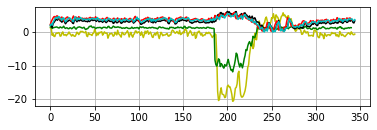

In [156]:
# Comparation char
feature = 3 # <-------- Play with this!!
plt.subplot(2, 1, 1)

plt.plot(csv_mfcc_c[:,feature], 'y')
plt.plot(mc[:,feature], 'g')
plt.plot(mfcc_lib_log.T[:,feature], 'k')
#plt.plot(mfcc_lib_db.T[:,feature], 'b')
plt.plot(mfcc_speech[:,feature], 'r')
plt.plot(mfcc_torch_log.T[:,feature], 'c')
#plt.plot(mfcc_torch_db.T[:,feature], 'g')
plt.grid()
